In [1]:
!pip install pyforest
!pip install -U keras-tuner

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15900 sha256=6099ed84842ada9cc11262157e7d42aa4f452860519d8cc9a48764504ec8f395
  Stored in directory: /Users/harshavardhannunna/Library/Caches/pip/wheels/66/4f/3c/cbdf5336b5a84f39cb6e3d76eecb9acf3f99a2c072785afecc
Successfully built pyforest
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 891.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 16.8 MB/s eta 0:00:00


In [7]:
import pyforest
import random
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.image as mpim
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import keras_tuner as kt

In [21]:
data_dir = '/Users/harshavardhannunna/Desktop/ML/food-101/images'
class_names_file_path = '//Users/harshavardhannunna/Desktop/ML/food-101/meta/classes.txt'

# Read class names from the file into a list
with open(class_names_file_path, 'r') as file:
    all_class_names = [line.strip() for line in file]

# Choose 10 classes randomly
chosen_classes = random.sample(all_class_names, 10)
print(chosen_classes)

# List of real class names
classes = chosen_classes

# Set the number of classes
num_classes = len(classes)

['chicken_wings', 'beef_tartare', 'caesar_salad', 'greek_salad', 'waffles', 'donuts', 'omelette', 'carrot_cake', 'cheese_plate', 'bruschetta']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

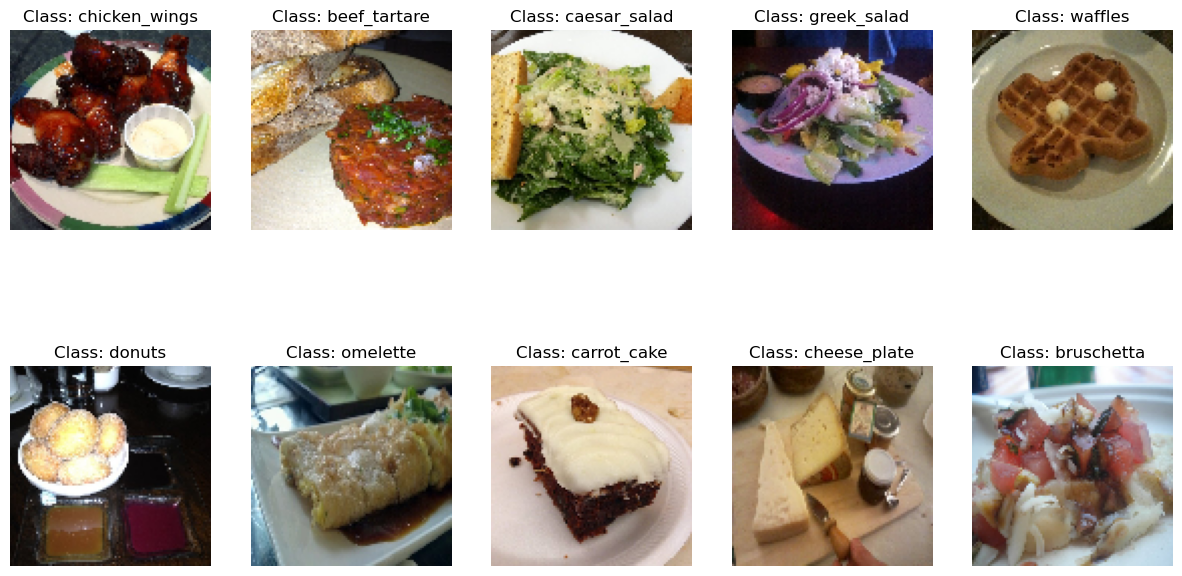

In [25]:
plt.figure(figsize=(15, 8))
for i in range(num_classes):
    class_folder = classes[i]
    class_path = os.path.join(data_dir, class_folder)
    
    # Get a random image from the class folder
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    
    # Load and display the image
    img = load_img(image_path, target_size=(100, 100))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_folder}")
    plt.axis('off')

plt.show()

In [27]:
model = models.Sequential()

# Add convolutional layers with activation and pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split the data into training and validation
)

batch_size = 32

# Use the same generator for both training and validation
generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # For training data
    classes=classes
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # For validation data
    classes=classes
)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 374ms/step - accuracy: 0.1400 - loss: 2.3492 - val_accuracy: 0.2470 - val_loss: 2.0751
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 367ms/step - accuracy: 0.2425 - loss: 2.0664 - val_accuracy: 0.2940 - val_loss: 1.9083
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 368ms/step - accuracy: 0.2909 - loss: 1.9559 - val_accuracy: 0.3650 - val_loss: 1.8356
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 97s 386ms/step - accuracy: 0.3383 - loss: 1.8593 - val_accuracy: 0.3740 - val_loss: 1.8000
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.3544 - loss: 1.8181 - val_accuracy: 0.3930 - val_loss: 1.6879
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 397ms/step - accuracy: 0.3855 - loss: 1.7492 - val_accuracy: 0.3910 - val_loss: 1.6884
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 379ms/step - accuracy: 0.3915 - loss: 1.7243 - val_accuracy: 0.4025 - val_loss: 1.6126
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 369ms/step - accuracy: 0.4143 - loss: 1.6

In [31]:
# Evaluate the model on the validation set
evaluation = model.evaluate(validation_generator)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.5568 - loss: 1.3292
Loss: 1.3094674348831177
Accuracy: 0.5634999871253967


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

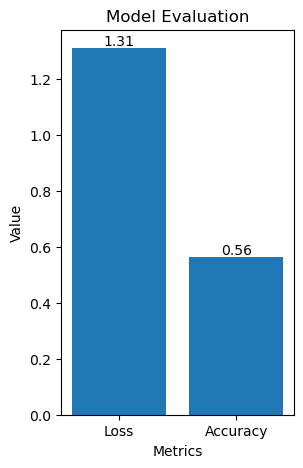

In [33]:
plt.figure(figsize=(3, 5))
bars = plt.bar(['Loss', 'Accuracy'], [evaluation[0], evaluation[1]])

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Model Evaluation')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

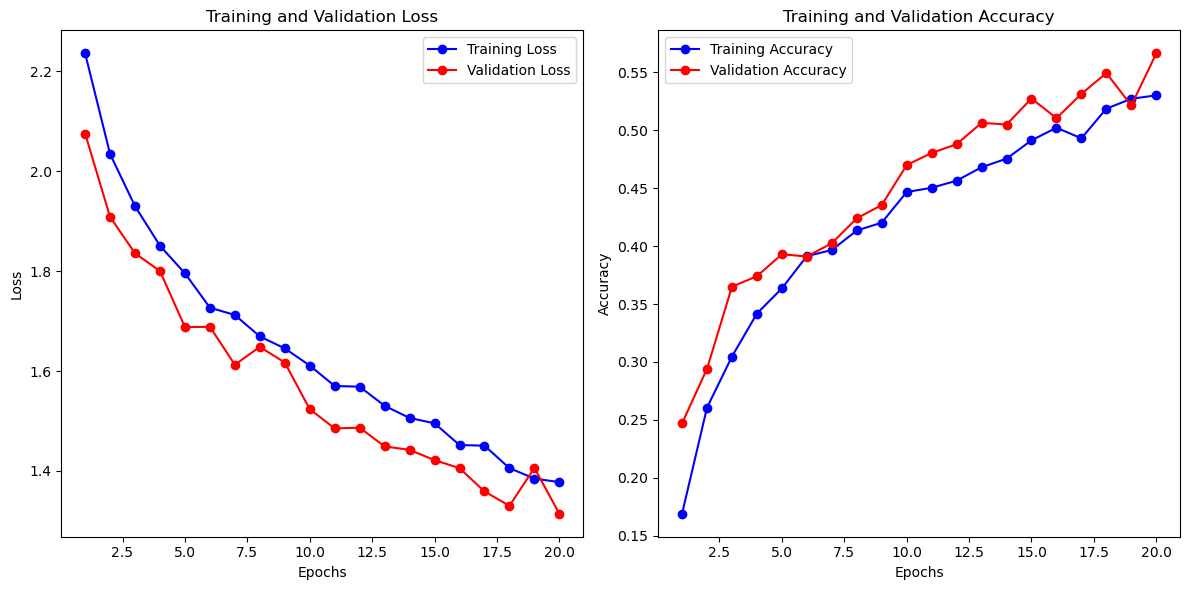

In [35]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Define a model-building function
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuner_dir',
    project_name='food_classification'
)

# Search for the best hyperparameters
tuner.search(
    generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping],
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 17m 55s]
val_accuracy: 0.5184999704360962

Best val_accuracy So Far: 0.5565000176429749
Total elapsed time: 01h 29m 27s


In [39]:
# Print the best hyperparameters
print(f"Best Hyperparameters:\n{best_hps.values}")

Best Hyperparameters:
{'dropout': 0.0, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


In [53]:
best_model = tuner.hypermodel.build(best_hps)

# Train the best model with the best hyperparameters
history_best_model = best_model.fit(
    generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Save the best model and its weights
best_model.save('best_model.h5')

Epoch 1/20
  9/250 ━━━━━━━━━━━━━━━━━━━━ 6:49 2s/step - accuracy: 0.0614 - loss: 7.6108

KeyboardInterrupt: 

In [43]:
evaluation = best_model.evaluate(validation_generator)
print("Best Model Validation Loss:", evaluation[0])
print("Best Model Validation Accuracy:", evaluation[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.6250 - loss: 1.1386
Best Model Validation Loss: 1.1166808605194092
Best Model Validation Accuracy: 0.6294999718666077


In [45]:
y_true = validation_generator.classes
y_pred_probs = best_model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_true, y_pred)
print("Validation Accuracy with Best Model:", validation_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step


<IPython.core.display.Javascript object>

Validation Accuracy with Best Model: 0.097


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

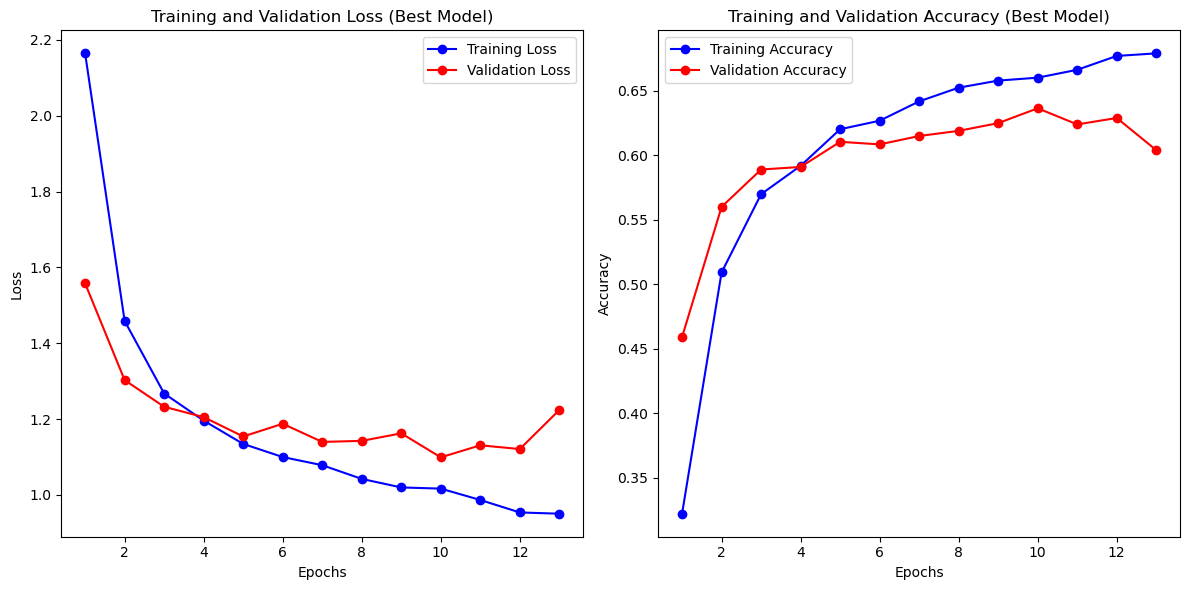

In [47]:
history_dict_best_model = history_best_model.history

loss_values_best_model = history_dict_best_model['loss']
val_loss_values_best_model = history_dict_best_model['val_loss']
acc_values_best_model = history_dict_best_model['accuracy']
val_acc_values_best_model = history_dict_best_model['val_accuracy']

epochs_best_model = range(1, len(loss_values_best_model) + 1)

plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_best_model, loss_values_best_model, 'bo-', label='Training Loss')
plt.plot(epochs_best_model, val_loss_values_best_model, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (Best Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_best_model, acc_values_best_model, 'bo-', label='Training Accuracy')
plt.plot(epochs_best_model, val_acc_values_best_model, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Best Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
loaded_model = load_model('best_model.h5')

def predict_and_display(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted Class: {classes[predicted_class]}")
    plt.axis('off')
    plt.show()

NameError: name 'load_model' is not defined

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

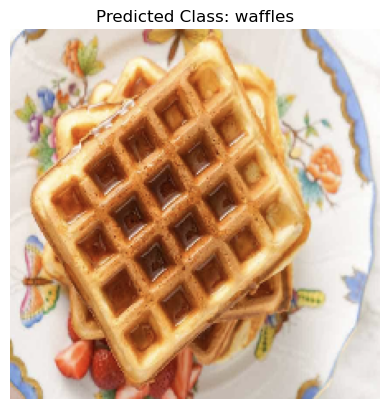

In [67]:
image_path = '/Users/harshavardhannunna/Desktop/ML/input/img2.png'
predict_and_display(image_path)

In [2]:
image_path1 = '/Users/harshavardhannunna/Desktop/om.jpg'
predict_and_display(image_path1)

NameError: name 'predict_and_display' is not defined